# Y. Afisha ~ Marketing Expense Optimization

## Introduction <a id='intro'></a>

This project aims to optimize marketing expenses for Y. Afisha, a travel activities and events booking platform. This study will  cover user logs, user puchases and marketing expenses over the periods from June 2017 to May 2018. Our primary criterias to study are as below:
1. User Activity
2. Retention Rates
3. Conversion Rates
3. Purchase Volume and Size
4. Ad Expenditure (overall, per ad source, over time)
5. Return on Marketing Investment

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Libraries & Data Loading](#lib)
* [Stage 2. Data overview](#do)
* [Stage 3. Data preprocessing](#dp)
* [Stage 4. Product Metrics](#pm)
    * [4.1. User Activity](#pm1)
    * [4.2. User Sessions](#pm2)
        * [Conclusion](#pm2_conclusion)
    * [4.3. User Retention Rate](#pm3)
        * [Conclusion](#pm3_conclusion)
* [Stage 5. Sales](#s)
    * [5.1. Customer Conversion Time Span](#s1)
        * [Conclusion](#s1_conclusion)
    * [5.2. Order Volume by Conversion Groups](#s2)
        * [Conclusion](#s2_conclusion)
    * [5.3. Order Volume (Overall)](#s3)
        * [Conclusion](#s3_conclusion)
    * [5.4. Average Purchase Size](#s4)
        * [Conclusion](#s4_conclusion)
    * [5.5. Lifetime Value (LTV)](#s5)
        * [Conclusion](#s5_conclusion)
* [Stage 6. Marketing](#m)
    * [6.1. Ad Expenditure](#m1)
        * [Conclusion](#m1_conclusion)
    * [6.2. Customer Acquisition Cost (CAC) by Ad Source](#m2)
        * [Conclusion](#m2_conclusion)
    * [6.3. Return on Marketing Investment (ROMI)](#m3)
        * [Conclusion](#m3_conclusion)        
* [Findings & Overall Conclusion](#findings)



# 1. Libraries & Data Loading <a id='lib'></a>

In [1]:
# Importing libraries:

import pandas as pd
import numpy as np
import math as mt
import scipy.stats as st
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Loading csv files:

try:
    visits = pd.read_csv('visits_log_us.csv')
    orders = pd.read_csv('orders_log_us.csv')
    costs = pd.read_csv('costs_us.csv')
    
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv')
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    costs = pd.read_csv('/datasets/costs_us.csv')

# 2. Data Overview <a id='do'></a>

In [3]:
# VISITS overview:

display(visits.head())
visits.info(memory_usage='deep')


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [4]:
# Device column value counts:

visits.Device.value_counts()                # Checking for potential category dtype

desktop    262567
touch       96833
Name: Device, dtype: int64

In [5]:
# Complete duplicate check:

visits.duplicated().sum()

0

**Observed Issues:**
1. Column names to be converted to snake case and lower case
2. Device column were found to contain only 2 categories and as such, will be converted to the Category type
3. End Ts and Start Ts will be converted to a DateTime object

In [6]:
# ORDERS overview:

display(orders.head())
display(orders.info(memory_usage='deep'))
orders.describe()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


None

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [7]:
# complete duplicate check:

orders.duplicated().sum()

0

**Observed Issues:** 
1. Columns to be conveted to snake case and lower case.
2. Buy Ts column to be converted to DateTime type.
3. There are minimum Revenue values of {0}. This needs to be investigated.

In [8]:
# Costs Overview:

display(costs.head())
display(costs.info(memory_usage='deep'))
costs.describe()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


None

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [9]:
# Complete duplicate check:

costs.duplicated().sum()

0

**Observed Issues:** 
1. Column 'dt' will renamed to 'date' for better readability
2. 'date' column will be converted to the DateTime type.

[Back to Contents](#back)

# 3. Data Preprocessing <a id='dp'></a>

In [10]:
# Applying fixes to Visits df:

visits.columns=['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits['device'] = visits['device'].astype('category')
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [11]:
# Applying fixes to Orders df:

orders.columns=['buy_ts', 'revenue', 'uid']
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


**Observed Issues:** 
1. Column 'dt' will renamed to 'ad_date' for better readability
2. 'ad_date' column will be converted to the DateTime type.

In [12]:
# Applying fixes to Costs df:

costs.rename(columns={'dt': 'ad_date'}, inplace=True)
costs['ad_date'] = pd.to_datetime(costs['ad_date'], format='%Y-%m-%d')

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   ad_date    2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


[Back to Contents](#back)

# 4. Product Metrics <a id='pm'></a>

## 4.1. User Activity <a id='pm1'></a>

In [13]:
# Extracting DateTime values:

visits['visit_year'] = visits['start_ts'].dt.isocalendar().year
visits['visit_month'] = visits['start_ts'].dt.month
visits['visit_week'] = visits['start_ts'].dt.isocalendar().week
visits['visit_date'] = visits['start_ts'].dt.date

visits.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [14]:
# Calculating MAU, WAU, DAU:

mau_total = (visits.groupby('visit_month', as_index=False)['uid'].nunique())
wau_total = (visits.groupby('visit_week', as_index=False)['uid'].nunique())
dau_total = (visits.groupby('visit_date', as_index=False)['uid'].nunique())

print(f"\033[1mMonthly Active Users: {round(mau_total['uid'].mean(), 2)}")
print(f"\033[1mWeekly Active Users: {round(wau_total['uid'].mean(), 2)}")
print(f"\033[1mDaily Active Users: {round(dau_total['uid'].mean(), 2)}")

Monthly Active Users: 23228.42
Weekly Active Users: 5825.29
Daily Active Users: 907.99


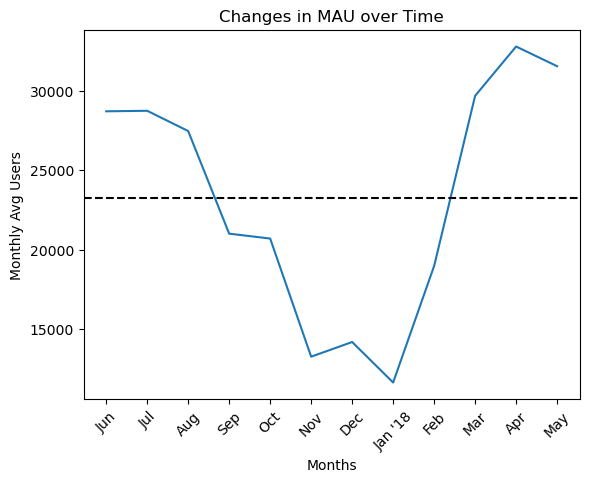

In [15]:
# Plotting changes in mau over time:

sns.lineplot(x='visit_month', y='uid', data=mau_total.reset_index())
plt.title('Changes in MAU over Time')
plt.axhline(y=23228.42, color='black', linestyle='--') 

plt.ylabel('Monthly Avg Users')
plt.xlabel('Months')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12], 
          labels=['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', "Jan '18", 'Feb', 'Mar', 'Apr', 'May'],
          rotation=45)
plt.show()

[Back to Contents](#back)

## 4.2. User Sessions <a id='pm2'></a>

In [16]:
# Calculating average daily sessions:

daily_sessions = visits.groupby('visit_date')['uid'].count().reset_index()
daily_sessions.columns=['visit_date', 'n_sessions']
display(daily_sessions.head())

print("\033[1mAverage Daily Sessions:", round(daily_sessions['n_sessions'].mean(), 2))

,visit_date,n_sessions
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893


Average Daily Sessions: 987.36


In [17]:
# Calculating average session duration:

visits['session_duration'] = (
    visits['end_ts'] - visits['start_ts']
).dt.seconds

visits.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


In [18]:
# Studying statistical overview of 'session_duration':

visits['session_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

In [19]:
# Calculating length of 0 value session_duration entries:

display(len(visits.query("session_duration == 0")))
len(visits.query("session_duration == 0")) / len(visits)

35794

0.0995937673900946

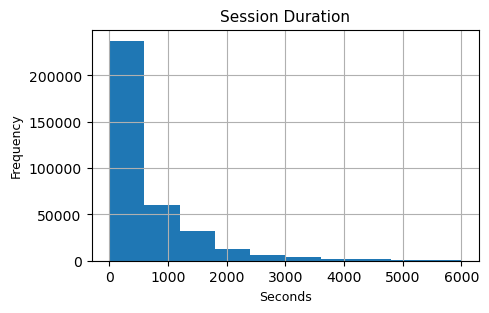

In [20]:
# Studying distribution of 'session_duration':

visits['session_duration'].hist(range=[0, 6000], figsize=(5,3))

plt.title('Session Duration', fontsize=11)
plt.xlabel('Seconds', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.show()

In [21]:
# Getting the mode from our 'session_duration' column:

print("\033[1mAverage Session Duration:",visits['session_duration'].mode()[0], "seconds")

Average Session Duration: 60 seconds


### Conclusion <a id='pm2_conclusion'></a>
1. An average of 987 users visit our Y.Afisha website on the daily. Of this daily average, users typically spend a minute on the website. This isn't very long; however, we have to remember the nature of the business is akin to window shopping. Numerous events and activities come and go, most of which might not appeal to everyone. Moreover, these visits could just be a quick information grab and does not necessarily equate to a purchase every round. 
2. On the flipside, we found about 10% of visits that amounted to 0 second durations. We can only assume this was due to a bounce: these customers had visited the landing page/home page, didn't like what they saw and left. Perhaps our advertisements are not consistent with the offerings shown on the landing page.

[Back to Contents](#back)

## 4.3. User Retention Rate <a id='pm3'></a>

In [22]:
# Creating cohorts of first ever visit dates by unique customers:

first_visit = visits.groupby('uid')['start_ts'].min()
first_visit.name = 'first_visit_ts'

visits = visits.join(first_visit, on='uid')

In [23]:
# Classifying first visit date and subsequent visit dates by their months:

visits['first_visit_month'] = visits['first_visit_ts'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')

In [24]:
# Creating monthly cohorts:

visit_cohorts = (visits
                  .groupby(['first_visit_month', 'visit_month'], as_index=False)
                  .agg({'uid': 'nunique'})
                 )  

In [25]:
# Creating lifetime groups:

visit_cohorts['cohort_lifetime'] = visit_cohorts['visit_month'] - visit_cohorts['first_visit_month']
visit_cohorts['cohort_lifetime'] = (visit_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')).round().astype('int')

In [26]:
# Getting groupings of initial user counts for each cohort

initial_cohort_user_count = visit_cohorts.query("cohort_lifetime == 0")[['first_visit_month', 'uid']]   
initial_cohort_user_count = initial_cohort_user_count.rename(columns={'uid': 'cohort_users'})

In [27]:
# Merging initial user counts on cohorts table:

visit_cohorts = visit_cohorts.merge(initial_cohort_user_count, on='first_visit_month')

In [28]:
# Calculating retention rates for each cohort lifetime:

visit_cohorts['retention'] = visit_cohorts['uid'] / visit_cohorts['cohort_users']

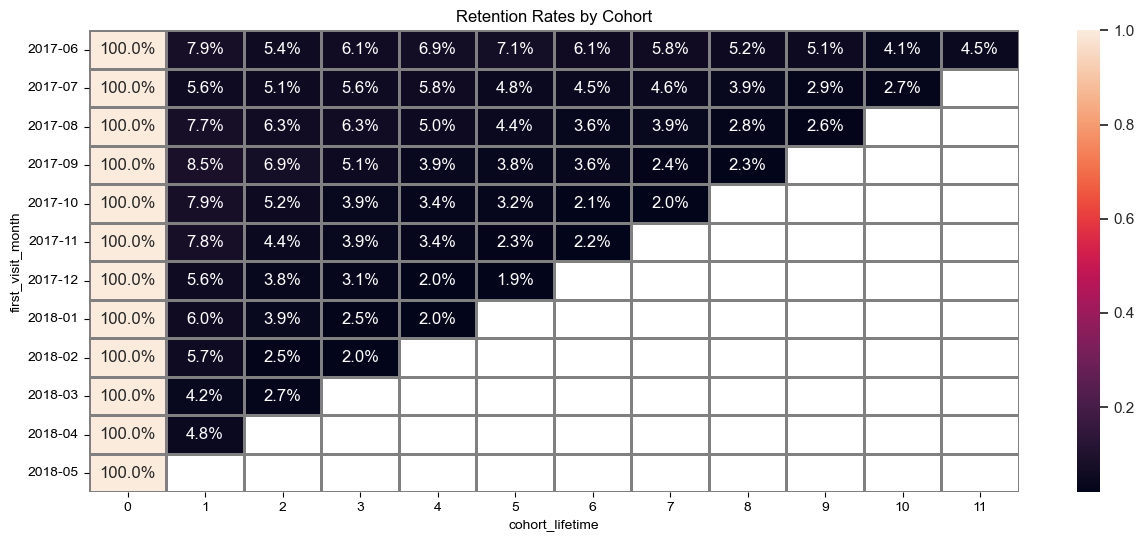

In [29]:
# Visualizing retention rates:

retention_pivot = visit_cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='retention', aggfunc='sum')
retention_pivot.index = retention_pivot.index.strftime('%Y-%m')

plt.figure(figsize=(15, 6))
plt.title('Retention Rates by Cohort')
sns.set(style='white')
sns.heatmap(
    retention_pivot,
    annot=True,         
    fmt='.1%',     
    linewidths=1,  
    linecolor='gray',                
) 
plt.show()

### Conclusion <a id='pm3_conclusion'></a>
1. Our overall retention rates aren't very high, in that all cohorts over their entire lifetime are below the 10% mark, coupled with the fact each cohort trends towards a decline throughout their lifetime. This is perhaps due to the nature of the business. High profile events like concerts and blockbuster movies come and go, and a particular user might only be after a particular activity/event. Moreover, holiday-goers (especially if they are foreigners) are most likely on the lookout for things to do for a very specific time, which explains a low retention rate for this subset of users.
2. Looking at first lifetime month groups: Apart from the July cohort, the latter half of the year seems to contain a pretty even distribution before it starts declining towards the first half of the proceeding year. Are there less high scale events in that time period? Could we perhaps introduce a more sustainable model of activities revolving around small scale activities like fitness and food to plug these aforementioned gaps?

[Back to Contents](#back)

# 5. Sales <a id='s'></a>

## 5.1. Customer Conversion Time Span <a id='s1'></a>

In [30]:
# Extracting first order dates:
## Merging on visits

first_orders = orders.groupby('uid')['buy_ts'].min()
first_orders.name = 'first_order_ts'

orders = orders.join(first_orders, on='uid')

In [31]:
# Merging our first_visit table (with first visit dates) with the orders table(with first order dates)
## Obtaining uid's of visitors who inevitably converted to customers

orders = orders.merge(first_visit, on='uid', how='left')

In [32]:
# Calculating conversion duration:

orders['conversion_duration'] = orders.first_order_ts - orders.first_visit_ts

In [33]:
# Obtaining day values from our timestamp:

orders.conversion_duration = orders['conversion_duration'].dt.days

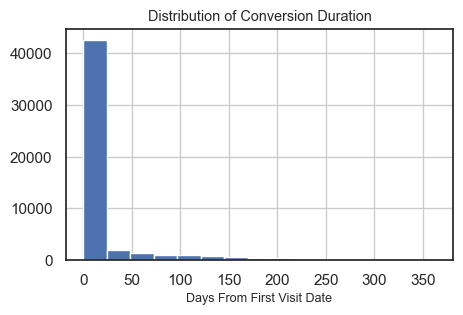

In [34]:
# Observing frequency distribution of conversion duration:

orders['conversion_duration'].hist(bins=15, figsize=(5, 3))

plt.title('Distribution of Conversion Duration', fontsize=10.4)
plt.xlabel('Days From First Visit Date', fontsize=9)

plt.show()

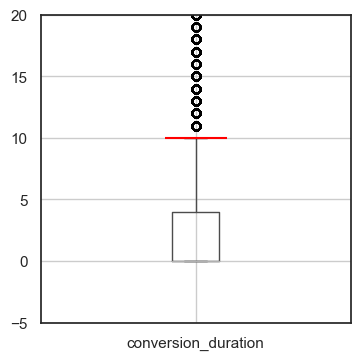

 Upper Limit: 10.0 days


In [35]:
# Observing the upper limit of conversion durations:

orders.boxplot(column='conversion_duration', figsize=(4, 4))

Q1 = orders['conversion_duration'].quantile(0.25)
Q3 = orders['conversion_duration'].quantile(0.75)
IQR = Q3 - Q1

plt.ylim(-5,20)
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')

plt.show()

print("\033[1m Upper Limit:", Q3+1.5*IQR, "days")

In [36]:
# Classifying the first 10 day durations into distinct categories:

timespan_dict = {
    0: '0d',
    1: '1d',
    2: '2d',
    3: '3d',
    4: '4d',
    5: '5d',
    6: '6d',
    7: '7d',
    8: '8d',
    9: '9d',
    10: '10d'
}

orders['conversion_duration'] = orders['conversion_duration'].map(timespan_dict)

In [37]:
# Classifying durations above 10 days into a separate category:

orders['conversion_duration'] = orders['conversion_duration'].fillna('10d+')

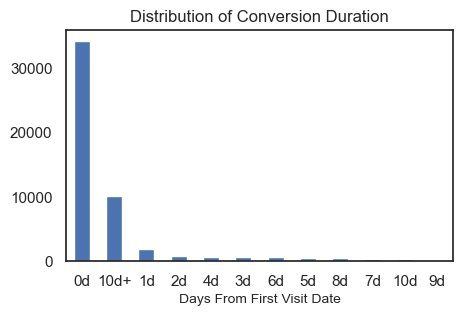

In [38]:
# Plotting and visualizing most frequent conversion durations:

orders['conversion_duration'].value_counts().plot(kind='bar', figsize=(5,3))
plt.title('Distribution of Conversion Duration')
plt.xlabel('Days From First Visit Date', fontsize=10)
plt.xticks(rotation=360)

plt.show()

**Observations:** Most of our customers converted on the day of their very first visit. This metric decreases the further in days we get from a user's first visit date. The more days that elapses, the lower the chance of a conversion.

In [39]:
# Changing dtype to category for ordering purposes:

t = pd.CategoricalDtype(
    categories=['0d', '1d', '2d', '3d', '4d', '5d', '6d', '7d', '8d', '9d', '10d', '10d+'], ordered=True
)

orders['conversion_duration'] = orders['conversion_duration'].astype(t)

In [40]:
# Getting our first order and visit months:

orders['first_order_month'] = orders['first_order_ts'].astype('datetime64[M]')
orders['first_visit_month'] = orders['first_visit_ts'].astype('datetime64[M]')

In [41]:
# Finding unique id count by cohort per conversion duration:

orders.pivot_table(index='first_order_month', columns='conversion_duration', values='uid', aggfunc='nunique')

conversion_duration,0d,1d,2d,3d,4d,5d,6d,7d,8d,9d,10d,10d+
first_order_month,,,,,,,,,,,,
2017-06-01,1799,55,27,33,18,11,15,8,10,4,5,38
2017-07-01,1530,57,36,19,22,19,13,12,14,6,8,187
2017-08-01,1095,26,11,12,14,10,9,7,5,4,2,175
2017-09-01,1968,71,38,32,23,16,32,16,12,8,13,352
2017-10-01,3299,114,72,64,38,42,38,25,23,17,10,598
2017-11-01,2866,142,70,60,35,29,24,21,19,21,22,772
2017-12-01,2996,132,69,67,40,42,34,31,26,19,22,905
2018-01-01,2318,88,54,36,35,26,20,19,18,16,9,734
2018-02-01,2487,99,71,37,43,25,22,36,18,17,16,780


**Observations:** Disregarding our 10d+ category, we can observe the obvious. The majority of converted customers are those who made a purchase on the very first day they visited the website. This shows that marketing creatives and subsequently consistency of our landing page to what was advertised is crucial in our conversion of first time customers. The more days that elapses, the lower the chance of a conversion. In other words, first impressions are paramount. Moving forward, we need to investigate the composition of user devices and ad-sources with regards to our 0d category.

In [42]:
# Extracting and merging visit data to orders data:

orders_unique = orders.query("buy_ts == first_order_ts")
visits_unique = visits.query("start_ts == first_visit_ts")

orders_converted_users = pd.merge(orders_unique, visits_unique, on=['uid', 'first_visit_ts', 'first_visit_month'])


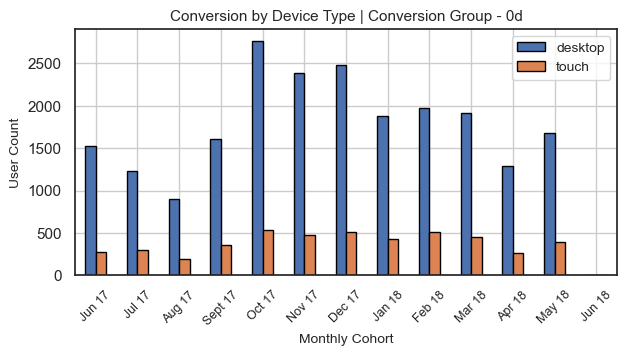

In [43]:
# Analyzing our 0d categories based off of device:

orders_converted_users_0d = orders_converted_users.query("conversion_duration == '0d'")

(orders_converted_users_0d
 .pivot_table(index='first_order_month', columns='device', values='uid', aggfunc='count')
 .plot(kind='bar', grid=True, edgecolor='black', figsize=(7,3.2))
)

plt.title('Conversion by Device Type | Conversion Group - 0d', fontsize=11)
plt.legend(loc='upper right', prop={'size': 10})
plt.xlabel('Monthly Cohort', fontsize=10)
plt.ylabel('User Count', fontsize=10)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
          labels=['Jun 17', 'Jul 17', 'Aug 17', 'Sept 17', 'Oct 17', 'Nov 17', 
                  'Dec 17', 'Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18'],
           rotation=45,
           fontsize=9
          )
plt.show()


**Observations:** Desktop users seem to be heavy favourites when it comes to preferred devices, and this is consitent throughout all cohorts. Could this mean our website isn't mobile-friendly?

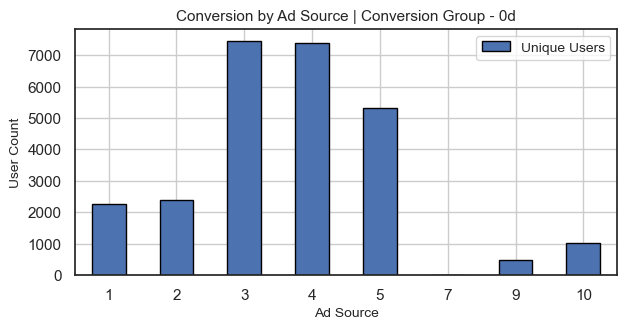

In [44]:
# Analyzing our 0d categories based off of ad source:

orders_converted_users_0d = orders_converted_users.query("conversion_duration == '0d'")

(orders_converted_users_0d
 .pivot_table(index='source_id', values='uid', aggfunc='count')
 .plot(kind='bar', grid=True, edgecolor='black', figsize=(7,3.2))
)

plt.title('Conversion by Ad Source | Conversion Group - 0d', fontsize=11)
plt.legend(['Unique Users'], loc='upper right', prop={'size': 10})
plt.xlabel('Ad Source', fontsize=10)
plt.ylabel('User Count', fontsize=10)
plt.xticks(rotation=360)

plt.show()

**Observations:** Ad sources 3 and 4 are the clear breadwinners, followed closely by 5. These ads are definitely doing something right in terms of their target audiences. On the flipside, ad sources 9 and 10 are the worst performing ad sources and perhaps it could be an area we could save budget on.

### Conclusion <a id='s1_conclusion'></a>
1. We grouped our converted users into categories of difference in days from their first visit to making their first purchase on our website. We set a threshold of 10 days as our maximum as objects above this represents outliers beyond our 1.5x interquartile range, subsequently grouping these said values into one category by itself. 
2. Disregarding our 10+ category, we can observe the obvious. The majority of converted customers are those who made a purchase on the very first day they visited the website. This shows that marketing creatives and subsequently consistency of our landing page to what was advertised is crucial in our conversion of first time customers. The more days that elapses, the lower the chance of a conversion. In other words, first impressions are paramount.
3. Customer conversion in majority came from desktop devices and this was observed across all cohorts for users that made a purchase on the same day they visited the site for the first time. This could perhaps suggest that our website isn't the most mobile-friendly. This should be looked at further.
4. Ad sources 3, 4 and 5 are our main income sources and should be focused on, while ad sources 1 and 2 have middling potential. The rest, and especially ad sources 7 and 8 are not making an impact whatsoever and should perhaps be dropped to cater more budget towards well-to-do ad sources.

[Back to Contents](#back)

## 5.2. Order Volume by Conversion Groups  <a id='s2'></a>

In [45]:
# Splitting customers who converted within 10 days of first visit and those who did not: 

orders.loc[orders['conversion_duration'] != '10d+', 'target_conversion'] \
= 1 # customers who converted within 10 days
orders.loc[orders['conversion_duration'] == '10d+', 'target_conversion'] \
= 0 # customers who did not

orders['target_conversion'] = orders['target_conversion'].astype('bool')

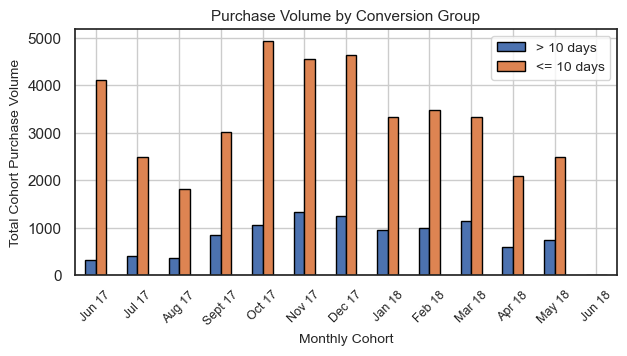

In [46]:
# Plotting a barchart of purchaser volume by conversion group for each monthly cohort:

(orders
 .pivot_table(index='first_order_month', columns='target_conversion', values='uid', aggfunc='count')
 .plot(kind='bar', grid=True, edgecolor='black', figsize=(7, 3.2))
)

plt.title('Purchase Volume by Conversion Group', fontsize=11)
plt.legend(['> 10 days', '<= 10 days'], loc='upper right', prop={'size': 10})
plt.xlabel('Monthly Cohort', fontsize=10)
plt.ylabel('Total Cohort Purchase Volume', fontsize=10)

plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
          labels=['Jun 17', 'Jul 17', 'Aug 17', 'Sept 17', 'Oct 17', 'Nov 17', 
                  'Dec 17', 'Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18'],
           rotation=45, fontsize=9
          )
plt.show()


### Conclusion <a id='s2_conclusion'></a>
1. Across all monthly cohorts, there is a significant disparity in purchase volume for customers who converted within a 10 day period. Purchase volume drops significantly for customers who converted above the 10 day threshold.
2. For our target conversion group **<=10d**, our purchase volume peaks in the last quarter of the year ( Oct, Nov, Dec ), which possibly coincides with the year end holidays (Halloween, Thanksgiving, Christmas, etc.)
3. A second peak in June coincides with the start of the summer holidays.

[Back to Contents](#back)

## 5.3. Order Volume (Overall) <a id='s3'></a>

In [47]:
# Consolidating dataframes:
# Retrieving orders whereby 'buy_ts' is within 'start_ts' and 'end_ts' intervals:

df = visits.merge(orders, on=['uid', 'first_visit_ts', 'first_visit_month'], how ='left')
df = (df.query("start_ts <= buy_ts <= end_ts")).reset_index(drop=True)
df['order_month'] = df['buy_ts'].astype('datetime64[M]')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35927 entries, 0 to 35926
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   device               35927 non-null  category      
 1   end_ts               35927 non-null  datetime64[ns]
 2   source_id            35927 non-null  int64         
 3   start_ts             35927 non-null  datetime64[ns]
 4   uid                  35927 non-null  uint64        
 5   visit_year           35927 non-null  UInt32        
 6   visit_month          35927 non-null  datetime64[ns]
 7   visit_week           35927 non-null  UInt32        
 8   visit_date           35927 non-null  object        
 9   session_duration     35927 non-null  int64         
 10  first_visit_ts       35927 non-null  datetime64[ns]
 11  first_visit_month    35927 non-null  datetime64[ns]
 12  buy_ts               35927 non-null  datetime64[ns]
 13  revenue              35927 non-

In [48]:
# Calculating total order volume by cohorts for every order month:

order_cohorts = (df
             .groupby(['first_order_month', 'order_month'], as_index=False)
             .agg({'uid': 'count'})
            ).rename(columns={'uid': 'order_volume'})

In [49]:
# Extracting lifetime values:

order_cohorts['cohort_lifetime'] = order_cohorts['order_month'] - order_cohorts['first_order_month']
order_cohorts['cohort_lifetime'] = (order_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')).round().astype('int')

In [50]:
# Merging lifetime groups to our main table:

df = df.merge(order_cohorts[['first_order_month', 'order_month', 'cohort_lifetime']], 
                           on=['first_order_month', 'order_month'], how='left')

In [51]:
# Converting monthly cohorts to strings:

order_cohorts['first_order_month'] = order_cohorts['first_order_month'].dt.strftime('%Y-%m')

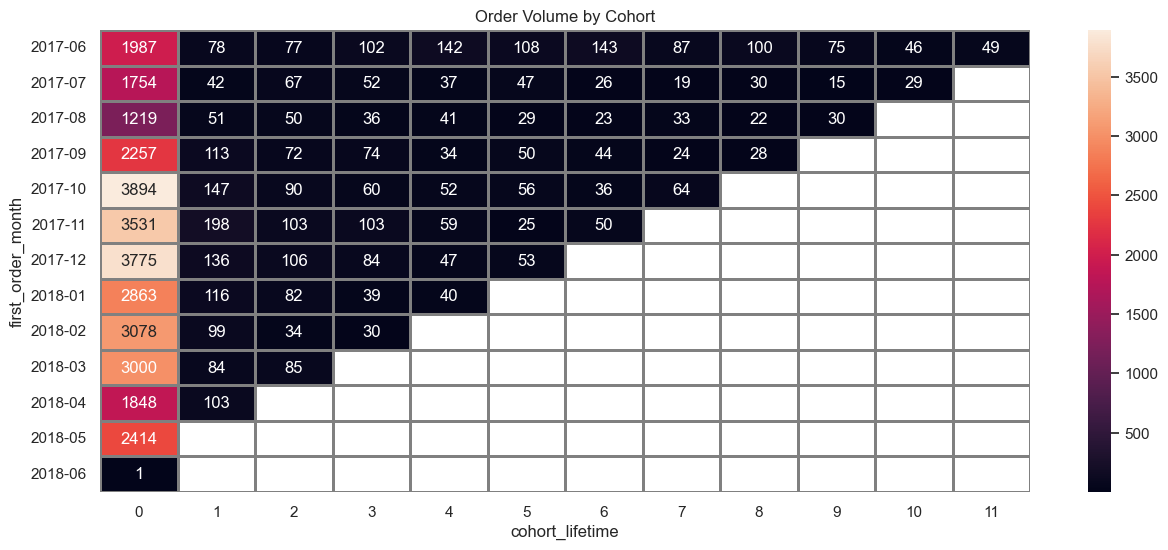

In [52]:
# Heatmap on order volume by cohort across their lifetime:

order_cohorts_pivot = \
order_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='order_volume',
    aggfunc='sum'
)

plt.figure(figsize=(15, 6))
plt.title('Order Volume by Cohort')
sns.set(style='white')
sns.heatmap(
    order_cohorts_pivot,
    annot=True,
    fmt='.0f',
    linewidths=1,  
    linecolor='gray',                
) 
plt.show()

**Observations:** It appears most of our buyers are potential single-time purchasers, making the majority of their purchases in one go. With the majority of order volume for each cohort happening in the 0th lifetime, we can assume the interval between the first purchase event and a repeat purchase event is vast.

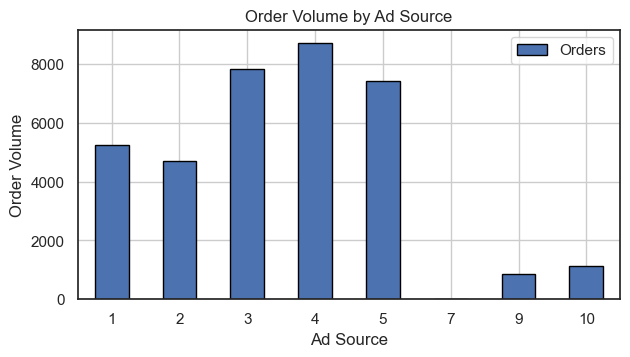

In [53]:
# computing total order volume by ad source:

order_vol_ads = df.pivot_table(index='source_id', values='uid', aggfunc='count')

order_vol_ads.plot(kind='bar', grid=True, edgecolor='black', figsize=(7,3.5))

plt.title('Order Volume by Ad Source')
plt.legend(['Orders'], loc='upper right', prop={'size': 11})
plt.xlabel('Ad Source')
plt.ylabel('Order Volume')
plt.xticks(rotation=360)
plt.show()



**Observations:** Ad Sources 3, 4 and 5 are bringing in the majority of our order volume, with ad sources 1 and 2 following in at roughly half the volume of ad source 4. Ad sources 7, 9 and 10 are pretty negligible in the grand scheme of things and could potentially indicate some ineffective advertising reach.

### Conclusion <a id='s3_conclusion'></a>
1. Majority of order volume across all cohorts happen in its 0th lifetime.
2. Ad sources 3, 4 and 5 are the leaders in metric of order volume by ad source, with ad source 1 and 2 following in roughly half the former's average value.

[Back to Contents](#back)

## 5.4. Average Purchase Size <a id='s4'></a>

In [54]:
# Grouping orders by cohorts:

order_cohorts = (df
                 .groupby(['first_order_month', 'order_month'], as_index=False)
                 .agg({'revenue': 'sum', 'uid': 'nunique'})
                )

order_cohorts.rename(columns={'uid': 'user_count'}, inplace=True)

In [55]:
# Calculating revenue per user column:

order_cohorts['revenue_per_user'] = order_cohorts['revenue'] / order_cohorts['user_count']

In [56]:
# Extracting lifetime groups:

order_cohorts['cohort_lifetime'] = order_cohorts['order_month'] - order_cohorts['first_order_month']
order_cohorts['cohort_lifetime'] = (order_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')).round().astype('int')

In [57]:
# Converting monthly cohorts to strings:

order_cohorts['first_order_month'] = order_cohorts['first_order_month'].dt.strftime('%Y-%m')

In [58]:
# Visualizing cohort revenue per user

order_cohorts_pivot = \
order_cohorts.pivot_table(
    index='first_order_month', 
    columns='cohort_lifetime', 
    values='revenue_per_user', 
    aggfunc='sum',
)

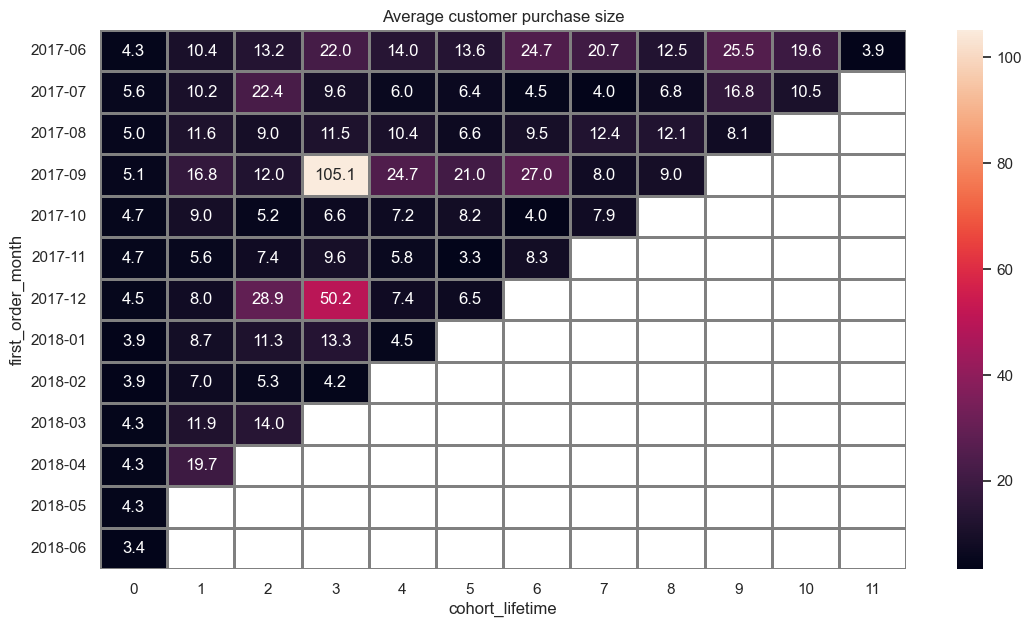

In [59]:
# Constructing a heatmap:

plt.figure(figsize=(13, 7))
plt.title('Average customer purchase size')
sns.heatmap(
    order_cohorts_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
) 

plt.show()

**Observations:**
It is clear our June 17' cohort has a consistently higher than average purchase size across its lifetime, especially when compared to the cohort of October 17', our first observed poorly performing cohort. We observe a couple of spikes in the September and December cohorts, but they are most likely due to a high profile event happening at the time.

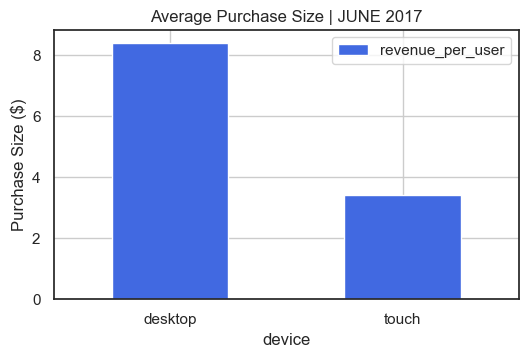

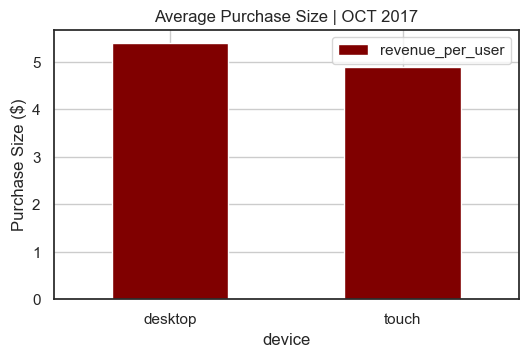

In [60]:
# Investigating purchase size of June 2017 Cohort: DEVICES

revenue_device = (df
                  .query("first_order_month == '2017-06-01'")
                  .groupby('device', as_index=False)
                  .agg({'revenue': 'sum', 'uid': 'nunique'})
                 )

revenue_device['revenue_per_user'] = revenue_device['revenue'] / revenue_device['uid']

(revenue_device
 .pivot_table(index='device', values='revenue_per_user', aggfunc='sum')
 .plot(kind='bar', grid=True, color='royalblue', figsize=(6,3.5))
)

plt.title('Average Purchase Size | JUNE 2017')
plt.ylabel('Purchase Size ($)')
plt.xticks(rotation=360)


# Investigating purchase October 2017 Cohort: DEVICES

revenue_device = (df
                  .query("first_order_month == '2017-10-01'")
                  .groupby('device', as_index=False)
                  .agg({'revenue': 'sum', 'uid': 'nunique'})
                 )

revenue_device['revenue_per_user'] = revenue_device['revenue'] / revenue_device['uid']

(revenue_device
 .pivot_table(index='device', values='revenue_per_user', aggfunc='sum')
 .plot(kind='bar', grid=True, color='maroon', figsize=(6,3.5))
)

plt.title('Average Purchase Size | OCT 2017')
plt.ylabel('Purchase Size ($)')
plt.xticks(rotation=360)


plt.tight_layout
plt.show()

**Observations:** The average purchase size desktop devices are clear winners in both cohorts. However, there is a distinct disparity in device values between both cohorts. The June cohort being our best performing one, exhibits stronger 'desktop' revenue compared to 'touch' devices at about roughly \\$USD 8.00 to \\$USD 3.50. In contrast, the October cohort depicts a roughly even purchase size at roughly \\$USD 5.00. 
<br><br>
**One thing is for certain - 'desktop' devices have a bigger impact in revenue generation.**  

In [61]:
# Calculating revenue per user by cohort lifetime for each ad source:

revenue_ads = (df
               .groupby(['source_id', 'cohort_lifetime'], as_index=False)
               .agg({'revenue': 'sum', 'uid': 'nunique'})
              )

revenue_ads['revenue_per_user'] = revenue_ads['revenue'] / revenue_ads['uid']
revenue_ads_pivot = revenue_ads.pivot_table(
    index='cohort_lifetime',
    columns='source_id',
    values='revenue_per_user',
    aggfunc='mean'

)


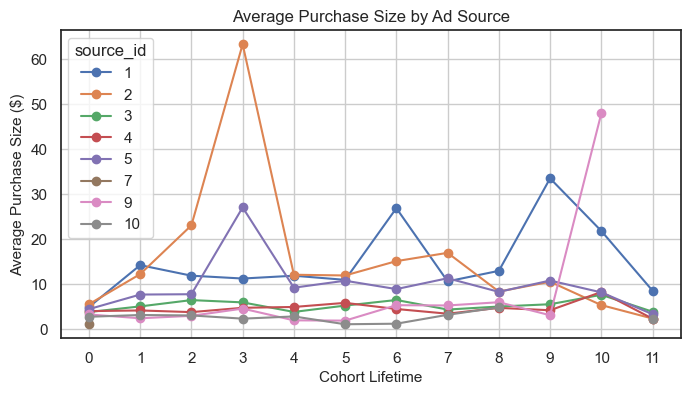

In [62]:
# Constructing a lineplot to showcase change in purchase size over time by each ad source:

revenue_ads_pivot.plot(style='o-', grid=True, figsize=(8, 4))

plt.title('Average Purchase Size by Ad Source', fontsize=12)
plt.xlabel('Cohort Lifetime', fontsize=11)
plt.ylabel('Average Purchase Size ($)', fontsize=11)

plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

plt.tight_layout
plt.show()

**Observations:** Ad sources 1, 2 and 5 are consistently valued higher in terms of average purchase size in contrast to our other ad sources. This is in contrast to our conversion rate study, whereby our highest converting ads sources for our best converting group (0d) were 3, 4 and 5, with ad sources 1 and 2 trailing moderately behind.

### Conclusion <a id='s4_conclusion'></a>
1. Taking a subset of cohorts which performed the best and worst in the average purchase size metric, we observed 'desktop' devices were a better revenue generator compared to 'touch' devices.
2. Ad sources 1, 2 and 5 are consistently outperforming the rest of our ad sources, and are our best bet at capturing larger revenue per order.

[Back to Contents](#back)

## 5.5. Lifetime Value (LTV) <a id='s5'></a>

In [63]:
# Merging costs on df:

df['visit_date'] = df['start_ts'].astype('datetime64[D]')
df = df.merge(costs, left_on=['source_id', 'visit_date'], right_on=['source_id', 'ad_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35926 entries, 0 to 35925
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   device               35926 non-null  category      
 1   end_ts               35926 non-null  datetime64[ns]
 2   source_id            35926 non-null  int64         
 3   start_ts             35926 non-null  datetime64[ns]
 4   uid                  35926 non-null  uint64        
 5   visit_year           35926 non-null  UInt32        
 6   visit_month          35926 non-null  datetime64[ns]
 7   visit_week           35926 non-null  UInt32        
 8   visit_date           35926 non-null  datetime64[ns]
 9   session_duration     35926 non-null  int64         
 10  first_visit_ts       35926 non-null  datetime64[ns]
 11  first_visit_month    35926 non-null  datetime64[ns]
 12  buy_ts               35926 non-null  datetime64[ns]
 13  revenue              35926 non-

In [64]:
# Dropping unncessary columns:

df.drop(['visit_year', 'visit_week'], axis=1, inplace=True)

In [65]:
# Calculating cohort sizes:

cohort_sizes = df.groupby('first_order_month', as_index=False)['uid'].nunique()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,1838
1,2017-07-01,1656
2,2017-08-01,1161
3,2017-09-01,2165
4,2017-10-01,3662


In [66]:
# Calculating total revenue by cohort for each order month:

order_cohorts = df.groupby(['first_order_month', 'order_month'], as_index=False)['revenue'].sum()

In [67]:
# Merging cohort_size table with order_cohorts-revenue table:

report = cohort_sizes.merge(order_cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,1838,2017-06-01,7813.96
1,2017-06-01,1838,2017-07-01,364.60
2,2017-06-01,1838,2017-08-01,368.87
3,2017-06-01,1838,2017-09-01,702.87
4,2017-06-01,1838,2017-10-01,712.57


In [68]:
# Calculating overall margin rate:

margin_rate = (orders['revenue'].sum() - costs['costs'].sum()) / orders['revenue'].sum()
margin_rate = margin_rate.round(decimals=2)
margin_rate

-0.31

In [69]:
# Calculating Gross Profit for each cohort and its respective order months:

report['gross_profit'] = report['revenue'] * margin_rate

In [70]:
# Extracting lifetime groups for our cohorts:

report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [71]:
# Computing LTV for each customer cohort

report['ltv'] = report['gross_profit'] / report['n_buyers'] 

In [72]:
# Converting first_order_month to object type:

report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m')

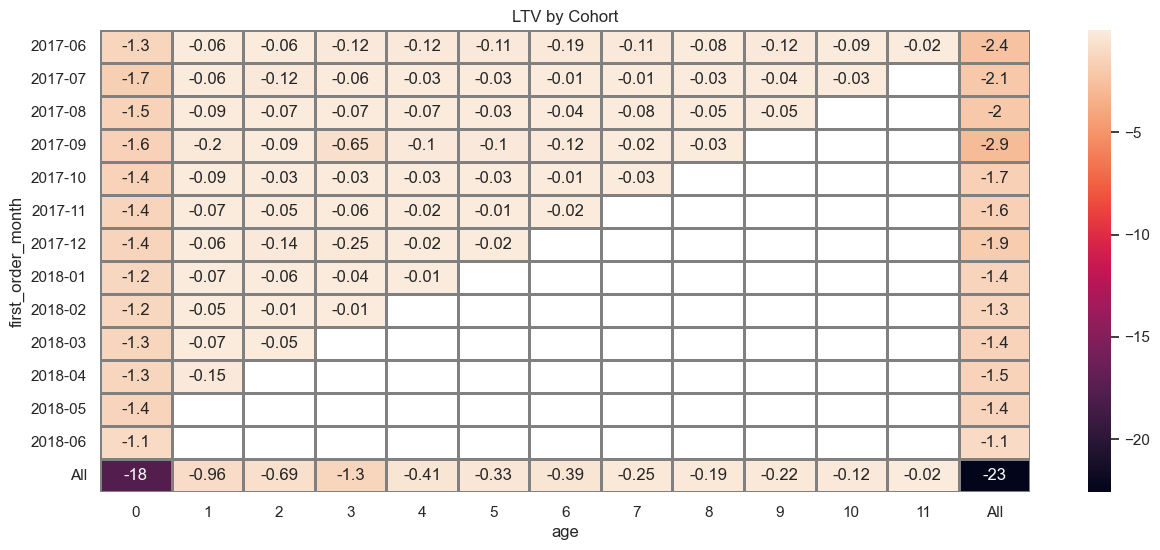

In [73]:
# Visualizing our LTV over time:

out = report.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv',
    aggfunc='sum',
    margins=True,
    dropna=False
).round(decimals=2)

plt.figure(figsize=(15, 6))
plt.title('LTV by Cohort')
sns.set(style='white')
sns.heatmap(
    out,
    annot=True,              
    linewidths=1,  
    linecolor='gray',                
) 
plt.show()

### Conclusion <a id='s5_conclusion'></a>
1. Firstly, the business as it currently stands is operating at a lost, with a gross profit margin of -31%. 
2. The typical customer in our longest cohort produces a lifetime value of - \\$2.40. This could just be a case of wasted costs on multiple ad sources that did not perform well in our previous studies, well as untapped potential in our 'touch' device-based population.

[Back to Contents](#back)

# 6. Marketing <a id='m'></a>

## 6.1. Ad Expenditure <a id='m1'></a>

In [74]:
# Extracting month values:

costs['ad_month'] = costs['ad_date'].astype('datetime64[M]')

In [75]:
# Calculating overall expenditure:

costs_total = costs['costs'].sum()
print(f"\033[1m Total Overall Expenditure: $USD {costs_total}")

 Total Overall Expenditure: $USD 329131.62


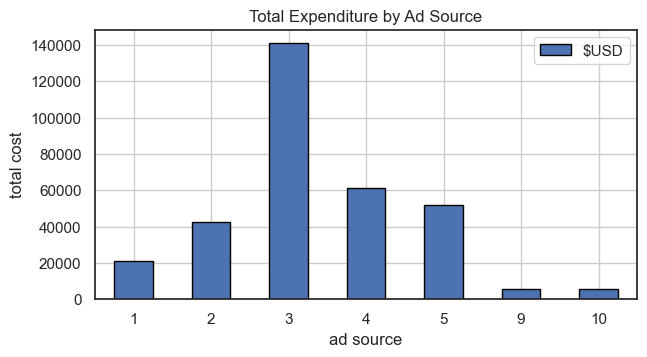

In [76]:
# Calculating total expenditure by ad source:

costs_by_ad = costs.pivot_table(
    index='source_id',
    values='costs',
    aggfunc='sum'
)
              
costs_by_ad.plot(kind='bar', grid=True, edgecolor='black', figsize=(7,3.5))

plt.title('Total Expenditure by Ad Source')
plt.legend(['$USD'], loc='upper right', prop={'size': 11})
plt.xlabel('ad source')
plt.ylabel('total cost')
plt.xticks(rotation=360)

plt.show()

**Observations:** 
1. Ad source 3 seems to be have the biggest percentage share of our expenditure budget. Looking back at our best conversion group(0d), ads sources 3 and 4 were tied for the best conversion share. Ad sources 3, 4 and 5 were also the runaway leaders in the order volume metric. We could be overpaying on ad source 3 and getting back diminishing returns, and hence is something we can **look at in terms of cost savings**.
2. Ad sources 4 and 5 are comparatively low in total expenditure, but represented some of our better order volume metrics. This is where we can **possibly scale up.

In [77]:
# Calculating expenditure over time vs revenue over time:

costs_over_time = costs.pivot_table(
    index='ad_month',
    values='costs',
    aggfunc='sum'
).reset_index()

rev_over_time = df.pivot_table(
    index='order_month',
    values='revenue',
    aggfunc='sum'
).reset_index()

out = pd.merge(costs_over_time, rev_over_time, left_on='ad_month', right_on='order_month')
out.drop('order_month', axis=1, inplace=True)
out.set_index('ad_month', inplace=True)

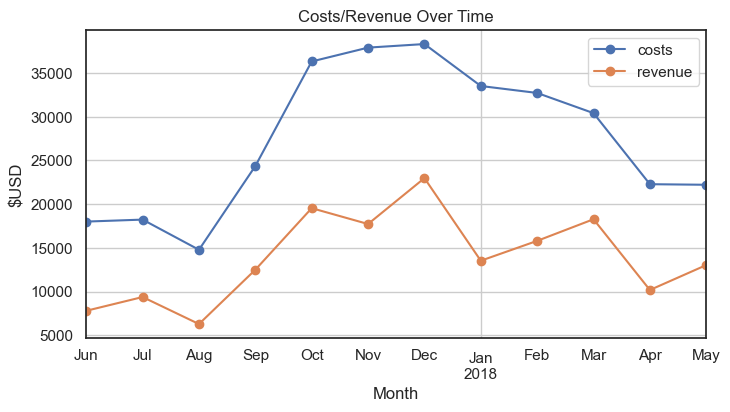

In [78]:
out.plot(style='o-', grid=True, figsize=(8, 4))

plt.title('Costs/Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('$USD')
plt.show()

**Observations:** Referring back to the ad sources we could potentially save on and ad sources that we could possibly scale up on:
1. The months of June to Oct affirms our bias, in that our higher revenue is a product of economies of scale. However, the gap between costs and revenue to do not seem to be bridging anytime soon, so this is perhaps a period we can save costs on low performing ads.
2. The months interval of Oct - Nov is a slight outlier, in that revenue dropped despite higher ad expenditure. This is a point in time we can cut back on certain ad sources as it represents a possible seasonal factor in play.
3. December to January interval appears to be a period of lost opportunity, as revenue decline directly correlated with a decrease in ad expenditure. Again, a potential for us to scale down on certain ads and boost higher performing ones.
4. The months of January to March is an oppportunity for exponential growth, as seen in the rise in revenue despite a cut in ad expenditure. This period should be a focus of scaling up.

### Conclusion <a id='m1_conclusion'></a>
1. Total Overall Expenditure: $USD 329131.62
2. Ad source 3 assumes the highest position in total expenditure between all ad sources and there could be some diminishing returns effects in play. Ad source 4 and 5 have relatively low expenditure, but as seen in the order volume metric, they assumed some of better to do ad sources.
3. Jun-Oct period seems indicate economies of scale, though revenue does not catch up at all to ad costs. **Potential for scaling down on certain ads**
4. Oct-Nov appears to be down period and is a possible **opportunity for cost-savings**.
5. Dec-Jan is a period to **boost higher performing ads and save costs on lower performing ones**.
6. Jan-Mar is a period for potential exponential growth as revenue remains high despite low ad expenditure. **Potential for economies of scale**.

[Back to Contents](#back)

## 6.2. Customer Acquisition Cost (CAC) by Ad Source<a id='m2'></a>

In [79]:
# Calculating no. of unique buyers coming from each distinct ad source:

ad_buyer_sizes = df.groupby('source_id', as_index=False)['uid'].nunique()
ad_buyer_sizes.columns = ['source_id', 'n_buyers']
ad_buyer_sizes.head()

,source_id,n_buyers
0,1,4336
1,2,3693
2,3,7584
3,4,8205
4,5,6449


In [80]:
# Calculating total marketing cost for each distinct ad source:

ad_costs = costs.groupby('source_id', as_index=False)['costs'].sum()
ad_costs.columns = ['source_id', 'total_cost']
ad_costs.head()

,source_id,total_cost
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10


In [81]:
# Merging total marketing costs with total unique buyers:
## Calculating CAC per ad source:

report_marketing = pd.merge(ad_buyer_sizes, ad_costs, on='source_id')
report_marketing['cac'] = report_marketing.total_cost / report_marketing.n_buyers

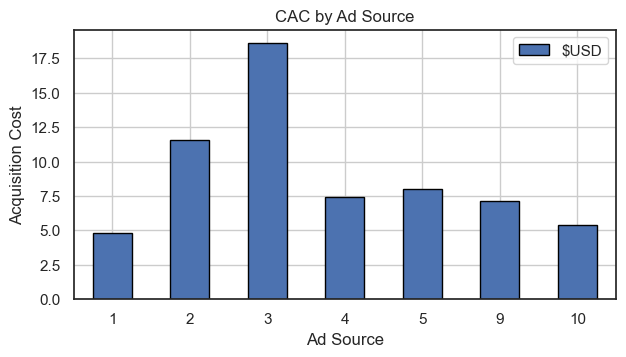

In [82]:
# Visualizing cac by ad source:

(report_marketing
 .pivot_table(index='source_id', values='cac', aggfunc='sum')
 .plot(kind='bar', grid=True, edgecolor='black', figsize=(7,3.5))
)

plt.title('CAC by Ad Source')
plt.legend(['$USD'], loc='upper right', prop={'size': 11})
plt.xlabel('Ad Source')
plt.ylabel('Acquisition Cost')
plt.xticks(rotation=360)
plt.show()

### Conclusion <a id='m2_conclusion'></a>
1. Yet again, we see expenditure per customer for ad source 3 being vastly higher than most other ad sources.
2. Between the two best performing ad sources in the conversion metric, ad source 4 is miles better than ad source 3 in terms of CAC.

[Back to Contents](#back)

## 6.3. Return on Marketing Investment (ROI) <a id='m3'></a>

In [83]:
# Extracting gross profit by ad source:

ad_revenue = df.groupby('source_id', as_index=False)['revenue'].sum()
ad_revenue.columns = ['source_id', 'gross_profit']
ad_revenue['gross_profit'] = ad_revenue['gross_profit'] * margin_rate

In [84]:
# Merging gross profit onto our marketing report table:

report_marketing = pd.merge(report_marketing, ad_revenue, on='source_id')
report_marketing.head()

,source_id,n_buyers,total_cost,cac,gross_profit
0,1,4336,20833.27,4.804721,-8900.0721
1,2,3693,42806.04,11.591129,-10465.8697
2,3,7584,141321.63,18.634181,-9439.4256
3,4,8205,61073.60,7.443461,-10738.0156
4,5,6449,51757.10,8.025601,-10457.1060


In [85]:
# Calculating LTV by ad source:

report_marketing['ltv'] = report_marketing['gross_profit'] / report_marketing['n_buyers']

In [86]:
# Calculating ROMI by ad source:

report_marketing['romi'] = (report_marketing['ltv'] / report_marketing['cac']).round(2)

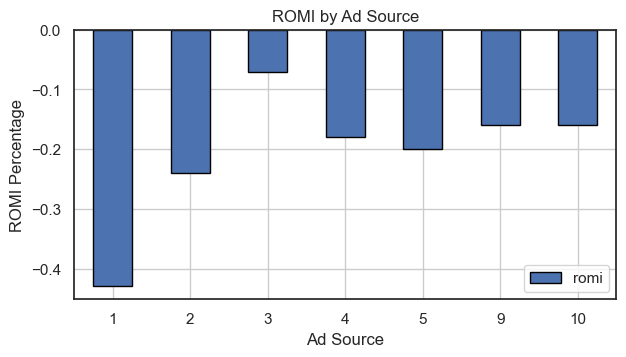

In [87]:
# Visualizing ROMI:

(report_marketing
 .pivot_table(index='source_id', values='romi', aggfunc='sum')
 .plot(kind='bar', grid=True, edgecolor='black', figsize=(7,3.5))
)

plt.title('ROMI by Ad Source')
plt.xlabel('Ad Source')
plt.ylabel('ROMI Percentage')
plt.xticks(rotation=360)


plt.show()

### Conclusion <a id='m3_conclusion'></a>
The ROMI metric tell us how cost-effective our marketing investments are. That being said, here are the observations:
1. Ad source 3, though showing immensely high costs, appears to be our best returning ad source by far, as it also accounts for both high conversion rates and high order volume together with moderate average purchase size.
2. Ad Sources 4 and 5 shows promise with their high purchase volume and low-moderate CAC.

[Back to Contents](#back)

# 7. Findings & Overall Conclusion <a id='findings'></a>

**N/B:** We found that the large majority new customer conversions come in the 0th - 1st day from a prospective customer's first visit. Anything beyond that and conversion rates decline rapdily and exponentially. Retention rates are also on average about roughly below 10% of original cohort numbers, which indicates how pivotal it is we capture conversion on a customers first visit. On a side note, we also found that the business is operating at a profit margin of -31%. That said, the following are suggestions on how we can improve on this.

1. Devices: We observed in the majority of our metrics, particularly in our Conversion Rate study on the 0 days conversion group, that across all monthly cohorts, Desktop devices far outweigh that of Touch devices. This could very well be due to an unoptimized mobile version of our website. A hypothetical scenario would be that a customer visits the website but finds it too hard to navigate pages efficiently. This could also indicate that our ads for touch devices just aren't standing out. **Either ways, the Touch device population segment represents lost oppotunity and hence untapped potential in our overall population.**


2. Ad Sources (AS):
-  Conversion Rate: AS 3 and 4 were almost neck and neck, assuming the highest overall position in the Conversion Rate metric.
-  Order Volume -  AS 3, 4 and 5 are the runaway leaders in this metric. AS 1 and 2 are roughly half of our leaders' volume with AS 9 and 10 insignifcantly low in comparison.
-  Average Purchase Size - Across 12 cohort lifetimes, AS 1, 2 and 5 were our leaders in Average Purchase Size, consistently besting our other AS for most of the time period. Notably, AS 3 was consistently hovering in the middle of the pack throughout all cohort lifetimes.  
-  Total Expenditure - AS 3 was our assumed our highest expenditure group, more than doubling AS 4 in second place. We thought this might be wasted budget initially, until we got to analyze our LTV, CAC and ROMI.
-  ROMI - Ad source 3, though showing immensely high costs, appears to be our best returning ad source by far, as it also accounts for both high conversion rates and high order volume together with moderate average purchase size. 

3. **Suggestions on Optimizing Marketing Expenses**:
- We need to optimize our mobile/touch version of our website as we are losing out on potential new customers everyday.
- Ad source 3 and 4 should be given a greater focus budget-wise as they represent ads that are converting customers at a high level, together with two of the highest purchase volumes.
- Ad source 5 should also be given some priority as its ads are generating high amounts of order volume and purchase size.
- There is some potential in ad source 2 as there is some decent order volume coupled with high average purchase size.
- Ad sources 1, 9 and 10 should possibly be looked at in terms of cost cuts as they have either too little volume, negligible conversion rates or extremely low ROMI rates, as seen with ad source 1.

[Back to Contents](#back)